In [0]:
import pandas as pd
from google.colab import files


In [41]:
uploaded = files.upload() #Upload file here

Saving Book1.csv to Book1 (2).csv


In [42]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "Book1.csv" with length 16158 bytes


In [0]:
import io
sample_df = pd.read_csv(io.StringIO(uploaded['Book1.csv'].decode('utf-8')),header=None)

In [0]:
sample_df =sample_df.transpose()
sample_df.columns=["Age","Blood_Pressure","BMI","Plasma_level","Autoimmune_Disease", "Adverse_events", "Drug_in_serum","Liver_function", "Activity_test", "Secondary_test"]
sample_df

In [0]:
S=sample_df[["Age", "Blood_Pressure", "BMI", "Plasma_level", "Adverse_events", "Drug_in_serum", "Liver_function", "Activity_test", "Secondary_test"]]
P=sample_df[["Autoimmune_Disease"]]

In [0]:
#Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Autoimmune_Disease=P.Autoimmune_Disease
y=pd.DataFrame(le.fit_transform(Autoimmune_Disease))

In [0]:
#Shape
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
X = sample_df.drop(columns = ['Autoimmune_Disease']) 
X_scaled = preprocessing.scale(X)
X_scaled.mean(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y) 
print(X_train.shape) 
print(X_test.shape)

In [0]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [50]:
#Logistic Regression Algorthim Accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7872340425531915


In [0]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred_class))
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [58]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))


0.7872340425531915
0.7872340425531915


In [60]:
print(TP / float(TP + FN))
print(TN / float(TN + FP))

0.4482758620689655
0.9384615384615385


In [59]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.7647058823529411
0.7647058823529411


In [0]:
logreg.predict(X_test)[0:10]
logreg.predict_proba(X_test)[0:10, :]
logreg.predict_proba(X_test)[0:10, 1]
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [57]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.5)[0]
y_pred_prob[0:10]
y_pred_class[0:10]
print(metrics.confusion_matrix(y_test, y_pred_class))

[[61  4]
 [16 13]]


In [31]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8153846153846154


In [0]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=5, scoring='roc_auc').mean()

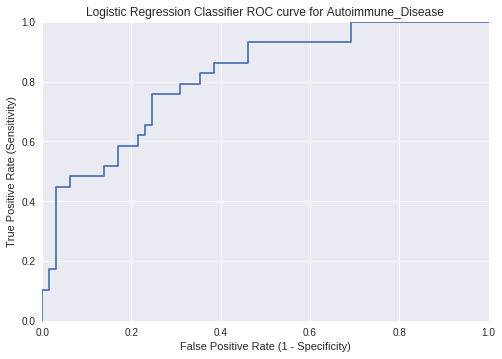

In [65]:
#Logistic Regression Classifier ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Logistic Regression Classifier ROC curve for Autoimmune_Disease')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)